# 이미지 인식 - CNN

## MNIST 사례

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [4]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape = (28, 28, 1), activation = 'relu'),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=2), # 9928
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [5]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [6]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [7]:
modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',
                               verbose = 1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=10)

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30,
                    batch_size = 200,
                    callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 45s 742us/step - loss: 0.3512 - accuracy: 0.8936 - val_loss: 0.0590 - val_accuracy: 0.9805

Epoch 00001: val_loss improved from inf to 0.05903, saving model to ./model/mnist-cnn-01-0.0590.hdf5
Epoch 2/30
60000/60000 [==============================] - 44s 740us/step - loss: 0.0981 - accuracy: 0.9728 - val_loss: 0.0410 - val_accuracy: 0.9870

Epoch 00002: val_loss improved from 0.05903 to 0.04102, saving model to ./model/mnist-cnn-02-0.0410.hdf5
Epoch 3/30
60000/60000 [==============================] - 45s 742us/step - loss: 0.0654 - accuracy: 0.9822 - val_loss: 0.0378 - val_accuracy: 0.9884

Epoch 00003: val_loss improved from 0.04102 to 0.03776, saving model to ./model/mnist-cnn-03-0.0378.hdf5
Epoch 4/30
60000/60000 [==============================] - 45s 746us/step - loss: 0.0546 - accuracy: 0.9845 - val_loss: 0.0376 - val_accuracy: 0.9888

Epoch 00004: val_loss improved from 0.0

In [9]:
from keras.models import load_model
del model
model = load_model('model/mnist-cnn-18-0.0284.hdf5')

In [10]:
print("\n Test Accuracy: %.4f" %(model.evaluate(X_test, y_test, verbose = 0)[1]))


 Test Accuracy: 0.9928


In [11]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

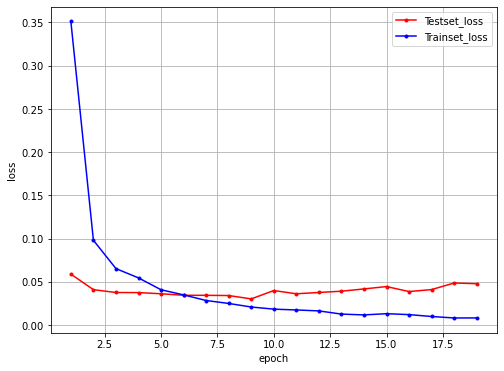

In [12]:
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize = (8,6))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

plt.legend(loc = 'upper right')

plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()